This dataset is downloaded from uci repository Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [ ]:
import pandas as pd 
data = pd.read_csv('BankNote_Authentication.csv')
data.head()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**Let's check for the missing values** 

In [3]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [4]:
import seaborn as sns
sns.heatmap(data.isnull(), yticklabels = False, cbar = True , cmap = 'viridis' )

Clearly we do not have any null values in the data set sa indicated by seaborn and null function 

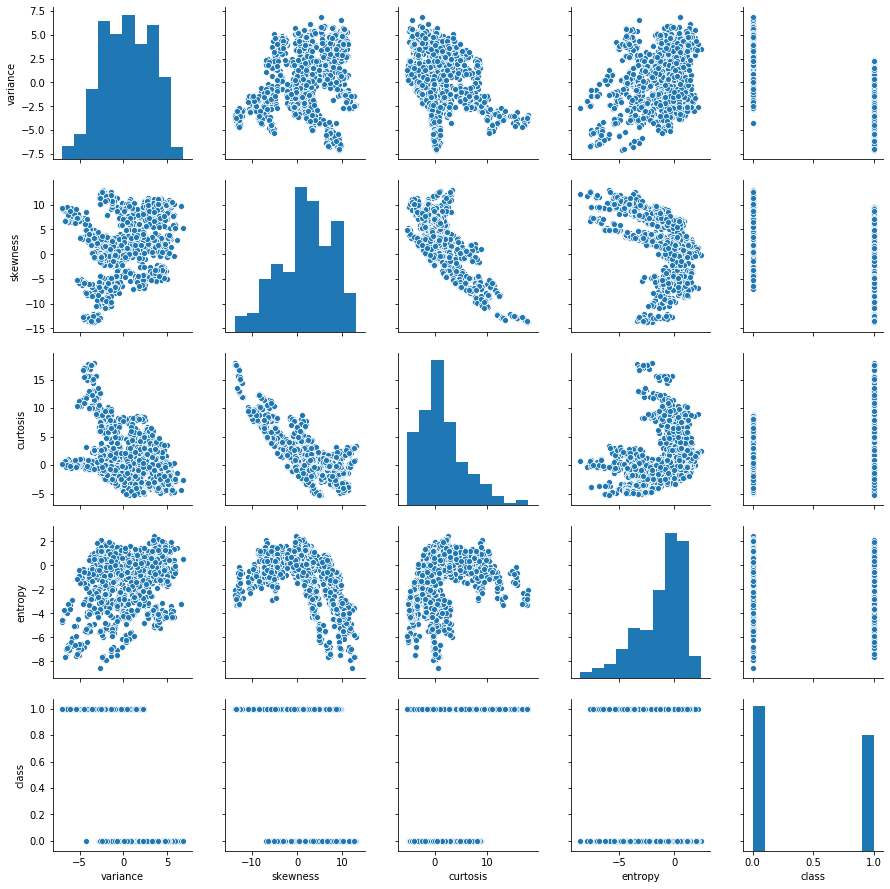

In [5]:
import seaborn as sns 
sns.pairplot(data)

In [6]:
data.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


Based on the results obtained variance shows a strong negative relation with the class followed by skewnews . Entropy shows a small effect on the dataset.

In [7]:
X = data.iloc[:,:4]
Y = data.iloc[:,-1]

In [8]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [9]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
y_predict = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, y_predict)


In [14]:
score

0.9902912621359223

In [15]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()  # to close the pickle file

**We are saving the data in the form of pickle file which will be used later to analyse and solve the data set.**

In [16]:
import numpy as np
classifier.predict([[2,3,4,1]])

array([0], dtype=int64)

**Understanding dataset using KNN classifier**

In [26]:
from sklearn.utils import shuffle
df = shuffle(data)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
classifier.score(X_train, Y_train)


1.0

In [33]:
classifier.score(X_test, Y_test)

1.0

In [28]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, Y_train, cv=10)

In [29]:
score.mean()

1.0

Text(0, 0.5, 'Accuracy rate')

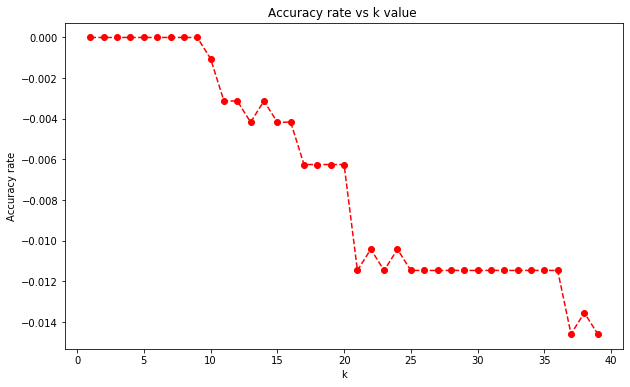

In [31]:
accuracy_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,X_train, Y_train, cv=10, scoring='neg_mean_squared_error' )
    accuracy_rate.append(score.mean())
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), accuracy_rate, color='red', linestyle='dashed', marker='o')
plt.title('Accuracy rate vs k value ')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

We have selected negative mean square error hence our data close to zero shows the best accuracy. Here we can infer , upto 10 neighbors the model performs better. The pickle file we had made in previous dataset will be used to delpoy the model in postman app. 